In [24]:
import pandas as pd

# Load the CSV files into DataFrames
df_sales = pd.read_csv('data/sales.csv')
df_products = pd.read_csv('data/products.csv')
df_orders = pd.read_csv('data/orders.csv')
df_customers = pd.read_csv('data/customers.csv')

df_products.rename(columns={'product_ID': 'product_id'}, inplace=True)

# print(df_sales.head())
# print(df_sales.shape)
# print(df_products.head())
# print(df_products.shape)
# print(df_orders.head())
# print(df_orders.shape)
# print(df_customers.head())
# print(df_customers.shape)

df_merged = pd.merge(df_sales, df_products, on='product_id', how='inner')
df_merged = pd.merge(df_merged, df_orders, on='order_id', how='inner')
df_merged = pd.merge(df_merged, df_customers, on='customer_id', how='inner')


print(df_merged.head())
df_merged.to_csv('data/merged_data_raw.csv', index=False)
print(df_merged.shape)

   sales_id  order_id  product_id  price_per_unit  quantity_sold  total_price   
0         0         1         218             106              2          212  \
1         1         1         481             118              1          118   
2         2         1           2              96              3          288   
3         3         1        1002             106              2          212   
4         4         1         691             113              3          339   

  product_type  product_name size  colour  ...  order_date  delivery_date   
0        Shirt      Chambray    L  orange  ...   2021-8-30     2021-09-24  \
1       Jacket        Puffer    S  indigo  ...   2021-8-30     2021-09-24   
2        Shirt  Oxford Cloth    M     red  ...   2021-8-30     2021-09-24   
3     Trousers          Wool    M    blue  ...   2021-8-30     2021-09-24   
4       Jacket         Parka    S  indigo  ...   2021-8-30     2021-09-24   

      customer_name       gender  age             

In [25]:
# Check for missing values
print(df_merged.isnull().sum())

# Check data types
print(df_merged.dtypes)

# data cleaning
df_merged = df_merged.drop_duplicates()

# Convert 'order_date' and 'delivery_date' to datetime
df_merged['order_date'] = pd.to_datetime(df_merged['order_date'])
df_merged['delivery_date'] = pd.to_datetime(df_merged['delivery_date'])

# Example of a new feature: Days to deliver
df_merged['days_to_deliver'] = (df_merged['delivery_date'] - df_merged['order_date']).dt.days

# Display the adjusted DataFrame
print(df_merged.head())
df_merged.to_csv('data/merged_data.csv', index=False)



sales_id          0
order_id          0
product_id        0
price_per_unit    0
quantity_sold     0
total_price       0
product_type      0
product_name      0
size              0
colour            0
price             0
stock_quantity    0
description       0
customer_id       0
payment           0
order_date        0
delivery_date     0
customer_name     0
gender            0
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64
sales_id           int64
order_id           int64
product_id         int64
price_per_unit     int64
quantity_sold      int64
total_price        int64
product_type      object
product_name      object
size              object
colour            object
price              int64
stock_quantity     int64
description       object
customer_id        int64
payment            int64
order_date        object
delivery_date     object
customer_name     object
gender            object
age         

Correlation Matrix:
                 price_per_unit  quantity_sold  total_price   payment   
price_per_unit         1.000000       0.019318     0.232178  0.010412  \
quantity_sold          0.019318       1.000000     0.973141  0.011697   
total_price            0.232178       0.973141     1.000000  0.013233   
payment                0.010412       0.011697     0.013233  1.000000   
age                    0.012690       0.022322     0.023692  0.017305   
days_to_deliver        0.015311       0.027135     0.030258 -0.056580   

                      age  days_to_deliver  
price_per_unit   0.012690         0.015311  
quantity_sold    0.022322         0.027135  
total_price      0.023692         0.030258  
payment          0.017305        -0.056580  
age              1.000000        -0.029761  
days_to_deliver -0.029761         1.000000  


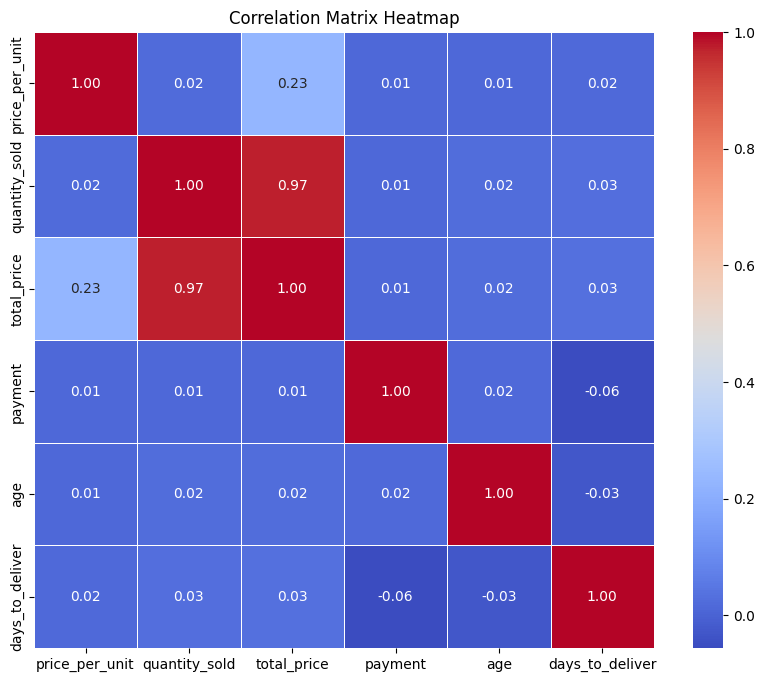

In [35]:
numerical_vars = df_merged[['price_per_unit', 'quantity_sold', 'total_price', 'payment', 'age', 'days_to_deliver']]

# Calculate correlation matrix
correlation_matrix = numerical_vars.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# todo: non numerical variables

import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



In [37]:

import scipy.stats as stats
from itertools import combinations

# Load your data
df = pd.read_csv('data/merged_data.csv')

# some transformation ideas
# Convert date to datetime and extract month
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['month'] = df['order_date'].dt.month

# Categorize age into groups
if 'age' in df.columns:
    df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 65, 100], labels=['Youth', 'Young Adult', 'Adult', 'Senior'])

# ANOVA
def perform_anova(df, numerical, categorical):
    grouped = df.groupby(categorical)[numerical].apply(list)
    f_val, p_val = stats.f_oneway(*grouped)
    return f_val, p_val

# Chi-square test
def perform_chi_square(df, cat1, cat2):
    table = pd.crosstab(df[cat1], df[cat2])
    chi2, p = stats.chi2_contingency(table)[:2]
    return chi2, p

# ANOVA on price per unit across product types
f_val, p_val = perform_anova(df, 'price_per_unit', 'product_type')
print(f"ANOVA on price per unit across product types: F-value={f_val}, p-value={p_val}")

# Chi-square for product type and demographic groups
chi2, p = perform_chi_square(df, 'product_type', 'gender')
print(f"Chi-square for product type and gender: Chi2={chi2}, p-value={p}")

# Chi-square for product type across cities
if 'city' in df.columns:
    chi2, p = perform_chi_square(df, 'product_type', 'city')
    print(f"Chi-square for product type and city: Chi2={chi2}, p-value={p}")

# ANOVA for monthly sales
if 'month' in df.columns:
    f_val, p_val = perform_anova(df, 'quantity_sold', 'month')
    print(f"ANOVA for quantity sold across months: F-value={f_val}, p-value={p_val}")


ANOVA on price per unit across product types: F-value=158.66390457543474, p-value=1.558232496968769e-67
Chi-square for product type and gender: Chi2=19.01887688289363, p-value=0.1642292044333285
Chi-square for product type and city: Chi2=1193.6851198108263, p-value=0.5940681608239126
ANOVA for quantity sold across months: F-value=0.7068397334048305, p-value=0.7032156607390802
